In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")

In [2]:
geo_loc = pd.read_csv("GEO_LOCATION.csv")
order_pay = pd.read_csv("ORDER_PAYMENTS.csv")
order_rate = pd.read_csv("ORDER_REVIEW_RATINGS.csv")
orders = pd.read_csv("ORDERS.csv")
prod = pd.read_csv("PRODUCTS.csv")
sellers = pd.read_csv("SELLERS.csv")
order_items = pd.read_csv("ORDER_ITEMS.csv")
cust = pd.read_csv("CUSTOMERS.csv")

In [3]:
geo_loc.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,Akkarampalle,Andhra Pradesh
1,1046,-23.546081,-46.644820,Akkarampalle,Andhra Pradesh
2,1041,-23.544392,-46.639499,Akkarampalle,Andhra Pradesh
3,1035,-23.541578,-46.641607,Akkarampalle,Andhra Pradesh
4,1012,-23.547762,-46.635361,Akkarampalle,Andhra Pradesh


In [4]:
order_pay.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [5]:
order_rate.head()

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,1/18/2018 0:00,1/18/2018 21:46
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,3/10/2018 0:00,3/11/2018 3:05
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2/17/2018 0:00,2/18/2018 14:36
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,4/21/2017 0:00,4/21/2017 22:02
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,3/1/2018 0:00,3/2/2018 10:26


In [6]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,8/8/2018 8:38,8/8/2018 8:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018 0:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,11/18/2017 19:28,11/18/2017 19:45,11/22/2017 13:39,12/2/2017 0:28,12/15/2017 0:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2/13/2018 21:18,2/13/2018 22:20,2/14/2018 19:46,2/16/2018 18:17,2/26/2018 0:00


In [7]:
prod.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,Sports_Leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,Baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,Housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [8]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,Alwal,Andhra Pradesh
1,d1b65fc7debc3361ea86b5f14c68d2e2,13023,Alwal,Andhra Pradesh
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,Badepalle,Andhra Pradesh
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,Akkarampalle,Andhra Pradesh
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,Koratla,Andhra Pradesh


In [9]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,1/18/2018 14:48,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,8/15/2018 10:10,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2/13/2017 13:57,199.90,18.14


In [10]:
cust.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh


In [11]:
geo_loc.dtypes

geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object

In [12]:
order_pay.dtypes

order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object

In [13]:
order_rate.dtypes

review_id                  object
order_id                   object
review_score                int64
review_creation_date       object
review_answer_timestamp    object
dtype: object

In [14]:
orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [15]:
prod.dtypes

product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object

In [16]:
sellers.dtypes

seller_id                 object
seller_zip_code_prefix     int64
seller_city               object
seller_state              object
dtype: object

In [17]:
order_items.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [18]:
cust.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [19]:
geo_loc.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [20]:
order_pay.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [21]:
order_rate.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [22]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [23]:
prod.isna().sum()

product_id                      0
product_category_name         623
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [24]:
sellers.isna().sum()

seller_id                  0
seller_zip_code_prefix     0
seller_city               57
seller_state              57
dtype: int64

In [25]:
order_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [26]:
cust.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

## 1. Perform Detailed exploratory analysis

#### a. Define & calculate high level metrics like (Total Revenue, Total quantity, Total products, Total categories, Total sellers, Total locations, Total channels, Total payment methods etc…)

In [27]:
print('Total Revenue =' ,round(order_items.price.sum(),2))
print('Total Quantity =' ,order_items.shape[0])
print('Total Products =' ,prod.product_id.nunique())
print('Total categories =' ,prod.shape[1])
print('Total sellers =' ,sellers.seller_id.nunique())
print('Total locations =' ,geo_loc.geolocation_zip_code_prefix.nunique())
print('Total payment methods =', order_pay.payment_type.nunique())

Total Revenue = 13591643.7
Total Quantity = 112650
Total Products = 32951
Total categories = 9
Total sellers = 3095
Total locations = 19015
Total payment methods = 5


#### b. Understanding how many new customers acquired every month

In [28]:
orders['order_purchase_timestamp']=pd.to_datetime( orders.order_purchase_timestamp, format ='%m/%d/%Y %H:%M')
orders['Year_month']= orders.order_purchase_timestamp.apply(lambda x: pd.Timestamp.strftime(x,format="%Y-%m"))

In [55]:
orders['Month']= orders.order_purchase_timestamp.apply(lambda x: pd.Timestamp.strftime(x,format="%b"))

In [58]:
cust_order = pd.merge(left=cust, right=orders, how='left', on='customer_id')

In [60]:
cust_month = cust_order.loc[:, ['customer_unique_id', 'Year_month']]

In [61]:
cust_month.drop_duplicates(subset='customer_unique_id' , inplace= True)

In [62]:
new_cust_monthly = cust_month.groupby('Year_month')[['customer_unique_id']].count()
new_cust_monthly

,customer_unique_id
Year_month,
2016-09,4
2016-10,315
2017-01,749
2017-02,1727
2017-03,2595
2017-04,2318
2017-05,3533
2017-06,3103
2017-07,3864


#### c. How the revenues from existing/new customers on month on month basis

In [33]:
order_item_month=pd.merge(left=order_items, right=orders, on='order_id', how ='left')
order_item_month['net_price']=order_item_month.price + order_item_month.freight_value
monthly_rev=order_item_month.groupby('Year_month')[['net_price']].sum()
monthly_rev.head(5)

,net_price
Year_month,
2016-09,354.75
2016-10,56808.84
2016-12,19.62
2017-01,137188.49
2017-02,286280.62


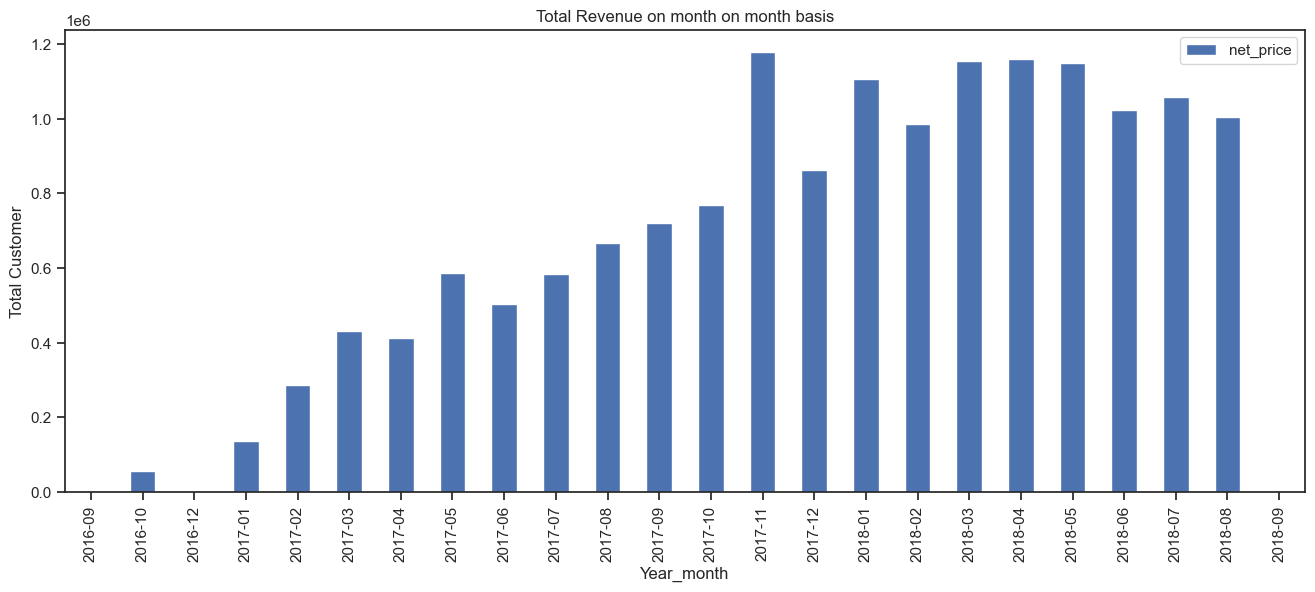

In [34]:
monthly_rev.plot( kind = 'bar', figsize =(16,6))
plt.ylabel('Total Customer')
plt.title('Total Revenue on month on month basis')
plt.show()

#### d. Popular Products by month, seller, state, category.

In [79]:
grouped_data1 = df2.groupby(['Month', 'seller_id', 'customer_state', 'product_category_name'])['price'].sum().reset_index()

most_popular_products = grouped_data1.groupby(['Month', 'seller_id', 'customer_state', 'product_category_name']).apply(lambda x: x.loc[x['price'].idxmax()])

most_popular_products = pd.DataFrame(most_popular_products)

In [81]:
most_popular_products

Month  \
Month seller_id                        customer_state  product_category_name                   
Apr   001cca7ae9ae17fb1caed9dfb1094831 Andhra Pradesh  Garden_Tools                      Apr   
                                       Chhattisgarh    Construction_Tools_Construction   Apr   
                                                       Garden_Tools                      Apr   
                                       Gujarat         Garden_Tools                      Apr   
                                       Madhya Pradesh  Garden_Tools                      Apr   
...                                                                                      ...   
Sep   febab0275244b9a49a623f0bd613ca2f Andhra Pradesh  Housewares                        Sep   
                                       Chhattisgarh    Housewares                        Sep   
      ffdd9f82b9a447f6f8d4b91554cc7dd3 Andhra Pradesh  Furniture_Decor                   Sep   
      ffeee66ac5d5a62fe688b9d26f83f534 Andhra Pradesh  Home_Appliances                   Sep   
      fffd5413c0700ac820c7069d66d98c89 Jammu & Kashmir Housewares                        Sep   

                                                                                                               seller_id  \
Month seller_id                        customer_state  product_category_name                                               
Apr   001cca7ae9ae17fb1caed9dfb1094831 Andhra Pradesh  Garden_Tools                     001cca7ae9ae17fb1caed9dfb1094831   
                                       Chhattisgarh    Construction_Tools_Construction  001cca7ae9ae17fb1caed9dfb1094831   
                                                       Garden_Tools                     001cca7ae9ae17fb1caed9dfb1094831   
                                       Gujarat         Garden_Tools                     001cca7ae9ae17fb1caed9dfb1094831   
                                       Madhya Pradesh  Garden_Tools                     001cca7ae9ae17fb1caed9dfb1094831   
...                                                                                                                  ...   
Sep   febab0275244b9a49a623f0bd613ca2f Andhra Pradesh  Housewares                       febab0275244b9a49a623f0bd613ca2f   
                                       Chhattisgarh    Housewares                       febab0275244b9a49a623f0bd613ca2f   
      ffdd9f82b9a447f6f8d4b91554cc7dd3 Andhra Pradesh  Furniture_Decor                  ffdd9f82b9a447f6f8d4b91554cc7dd3   
      ffeee66ac5d5a62fe688b9d26f83f534 Andhra Pradesh  Home_Appliances                  ffeee66ac5d5a62fe688b9d26f83f534   
      fffd5413c0700ac820c7069d66d98c89 Jammu & Kashmir Housewares                       fffd5413c0700ac820c7069d66d98c89   

                                                                                         customer_state  \
Month seller_id                        customer_state  product_category_name                              
Apr   001cca7ae9ae17fb1caed9dfb1094831 Andhra Pradesh  Garden_Tools                      Andhra Pradesh   
                                       Chhattisgarh    Construction_Tools_Construction     Chhattisgarh   
                                                       Garden_Tools                        Chhattisgarh   
                                       Gujarat         Garden_Tools                             Gujarat   
                                       Madhya Pradesh  Garden_Tools                      Madhya Pradesh   
...                                                                                                 ...   
Sep   febab0275244b9a49a623f0bd613ca2f Andhra Pradesh  Housewares                        Andhra Pradesh   
                                       Chhattisgarh    Housewares                          Chhattisgarh   
      ffdd9f82b9a447f6f8d4b91554cc7dd3 Andhra Pradesh  Furniture_Decor                   Andhra Pradesh   
      ffeee66ac5d5a62fe688b9d26f83f534 Andhra Pr

#### e. Popular categories by state, month

In [68]:
df1 = pd.merge(cust_order, order_items, on = 'order_id', how = 'left')
df1.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Year_month,Month,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:00,5/16/2017 15:22,5/23/2017 10:47,5/25/2017 10:35,6/5/2017 0:00,2017-05,May,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,5/22/2017 15:22,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:00,1/12/2018 20:58,1/15/2018 17:14,1/29/2018 12:41,2/6/2018 0:00,2018-01,Jan,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,1/18/2018 20:58,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:00,5/20/2018 16:19,6/11/2018 14:31,6/14/2018 17:58,6/13/2018 0:00,2018-05,May,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,6/5/2018 16:19,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:00,3/13/2018 17:29,3/27/2018 23:22,3/28/2018 16:04,4/10/2018 0:00,2018-03,Mar,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,3/27/2018 16:31,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:00,7/29/2018 10:10,7/30/2018 15:16,8/9/2018 20:55,8/15/2018 0:00,2018-07,Jul,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,7/31/2018 10:10,230.00,22.25


In [69]:
df2 = pd.merge(df1, prod, on = 'product_id', how = 'left')
df2.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:00,5/16/2017 15:22,5/23/2017 10:47,...,124.99,21.88,Office_Furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:00,1/12/2018 20:58,1/15/2018 17:14,...,289.00,46.48,Housewares,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:00,5/20/2018 16:19,6/11/2018 14:31,...,139.94,17.79,Office_Furniture,55.0,955.0,1.0,8267.0,52.0,52.0,17.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:00,3/13/2018 17:29,3/27/2018 23:22,...,149.94,23.36,Office_Furniture,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:00,7/29/2018 10:10,7/30/2018 15:16,...,230.00,22.25,Home_Confort,61.0,407.0,1.0,5200.0,45.0,15.0,35.0


In [72]:
cust_order
grouped_data = df2.groupby(['customer_state', 'Month', 'product_category_name'])['price'].sum().reset_index()
most_popular_categories = grouped_data.groupby(['customer_state', 'Month']).apply(lambda x: x.loc[x['price'].idxmax()])

most_popular_categories = pd.DataFrame(most_popular_categories)

In [73]:
most_popular_categories

customer_state Month  \
customer_state Month                         
Andhra Pradesh Apr    Andhra Pradesh   Apr   
               Aug    Andhra Pradesh   Aug   
               Dec    Andhra Pradesh   Dec   
               Feb    Andhra Pradesh   Feb   
               Jan    Andhra Pradesh   Jan   
...                              ...   ...   
West Bengal    Mar       West Bengal   Mar   
               May       West Bengal   May   
               Nov       West Bengal   Nov   
               Oct       West Bengal   Oct   
               Sep       West Bengal   Sep   

                                      product_category_name      price  
customer_state Month                                                    
Andhra Pradesh Apr                            Health_Beauty   71788.32  
               Aug                            Health_Beauty  106371.74  
               Dec                            Watches_Gifts   46647.37  
               Feb                    Computers_Accessories   71132.10  
               Jan                    Computers_Accessories   54948.39  
...                                                     ...        ...  
West Bengal    Mar    Small_Appliances_Home_Oven_And_Coffee    1799.00  
               May                                Computers     640.00  
               Nov                 Costruction_Tools_Garden     495.00  
               Oct                                Computers    1599.99  
               Sep                                Computers    1300.00  

[234 rows x 4 columns]

#### f. List top 10 most expensive products sorted by price

In [35]:
print('Top 10 most expensive products by price :')
order_items.loc[:, ['product_id','price']].drop_duplicates(subset='product_id' ).sort_values(by='price', ascending = False).head(10)

Top 10 most expensive products by price :


,product_id,price
3556,489ae2aa008f021502940f251d4cce7f,6735.00
112233,69c590f7ffc7bf8db97190b6cb6ed62e,6729.00
107841,1bdf5e6731585cf01aa8169c7028d6ad,6499.00
74336,a6492cc69376c469ab6f61d8f44de961,4799.00
11249,c3ed642d592594bb648ff4a04cee2747,4690.00
62086,259037a6a41845e455183f89c5035f18,4590.00
29193,a1beef8f3992dbd4cd8726796aa69c53,4399.87
45843,6cdf8fc1d741c76586d8b6b15e9eef30,4099.99
59137,6902c1962dd19d540807d0ab8fade5c6,3999.90
56663,4ca7b91a31637bd24fb8e559d5e015e4,3999.00


## 2. Performing Customers/sellers Segmentation

#### a. Divide the customers into groups based on the revenue generated

In [36]:
cust_order_items = pd.merge(left=cust_order , right=order_items, on= 'order_id', how ='inner')
cust_order_items.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Year_month,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:00,5/16/2017 15:22,5/23/2017 10:47,5/25/2017 10:35,6/5/2017 0:00,2017-05,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,5/22/2017 15:22,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:00,1/12/2018 20:58,1/15/2018 17:14,1/29/2018 12:41,2/6/2018 0:00,2018-01,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,1/18/2018 20:58,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:00,5/20/2018 16:19,6/11/2018 14:31,6/14/2018 17:58,6/13/2018 0:00,2018-05,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,6/5/2018 16:19,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:00,3/13/2018 17:29,3/27/2018 23:22,3/28/2018 16:04,4/10/2018 0:00,2018-03,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,3/27/2018 16:31,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:00,7/29/2018 10:10,7/30/2018 15:16,8/9/2018 20:55,8/15/2018 0:00,2018-07,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,7/31/2018 10:10,230.00,22.25


In [37]:
cust_order_items['net_price'] = cust_order_items.price + cust_order_items.freight_value
cust_rev = cust_order_items.groupby('customer_unique_id')['net_price'].sum().reset_index()
cust_rev.rename(columns ={'net_price':'total_spend_amt'} , inplace = True)
cust_rev.head()

,customer_unique_id,total_spend_amt
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89


In [38]:
cust_rev['cust_rev_group'] = pd.cut(cust_rev.total_spend_amt, bins= np.arange(0 , 15000, 1000), labels=['0-1000','1000-2000',
                                    '2000-3000','3000-4000','4000-5000','5000-6000','6000-7000','7000-8000','8000-9000',
                                    '9000-10000','10000-11000','11000-12000','12000-13000','13000-14000'])
cust_rev.head(10)

,customer_unique_id,total_spend_amt,cust_rev_group
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90,0-1000
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19,0-1000
2,0000f46a3911fa3c0805444483337064,86.22,0-1000
3,0000f6ccb0745a6a4b88665a16c9f078,43.62,0-1000
4,0004aac84e0df4da2b147fca70cf8255,196.89,0-1000
5,0004bd2a26a76fe21f786e4fbd80607f,166.98,0-1000
6,00050ab1314c0e55a6ca13cf7181fecf,35.38,0-1000
7,00053a61a98854899e70ed204dd4bafe,419.18,0-1000
8,0005e1862207bf6ccc02e4228effd9a0,150.12,0-1000
9,0005ef4cd20d2893f0d9fbd94d3c0d97,129.76,0-1000


#### b. Divide the sellers into groups based on the revenue generated

In [39]:
sellers_rev = order_items.groupby('seller_id')['price'].sum().reset_index()
sellers_rev.rename( columns = {'price':'total_sold_amt'}, inplace= True)
sellers_rev.total_sold_amt.max()

229472.63

In [40]:
sellers_rev['sellers_rev_group'] = pd.cut(sellers_rev.total_sold_amt, bins= np.arange(0 , 300000, 50000),
                                         labels=['0-50000','50000-100000','100000-150000','150000-200000','200000-250000'])
sellers_rev.head()

,seller_id,total_sold_amt,sellers_rev_group
0,0015a82c2db000af6aaaf3ae2ecb0532,2685.00,0-50000
1,001cca7ae9ae17fb1caed9dfb1094831,25080.03,0-50000
2,001e6ad469a905060d959994f1b41e4f,250.00,0-50000
3,002100f778ceb8431b7a1020ff7ab48f,1234.50,0-50000
4,003554e2dce176b5555353e4f3555ac8,120.00,0-50000


## 3. Cross-Selling (Which products are selling together)
Hint: We need to find which of the top 10 combinations of products are selling together in each transaction. (combination of 2 or 3 buying together)

In [41]:
orders_items = pd.merge(left=orders , right=order_items , on='order_id', how='left')
orders_items.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Year_month,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,2017-10,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,10/6/2017 11:07,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:00,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00,2018-07,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,7/30/2018 3:24,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:00,8/8/2018 8:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018 0:00,2018-08,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,8/13/2018 8:55,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:00,11/18/2017 19:45,11/22/2017 13:39,12/2/2017 0:28,12/15/2017 0:00,2017-11,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,11/23/2017 19:45,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:00,2/13/2018 22:20,2/14/2018 19:46,2/16/2018 18:17,2/26/2018 0:00,2018-02,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2/19/2018 20:31,19.90,8.72


In [42]:
cross_selling = orders_items[orders_items.duplicated(['order_purchase_timestamp','customer_id'],keep=False)].sort_values(by='order_purchase_timestamp')
cross_selling = cross_selling.loc[:,['customer_id','order_purchase_timestamp','product_id' ]]

In [43]:
cross_selling.drop_duplicates(subset ="product_id" ,inplace=True)
cross_selling = cross_selling[cross_selling.duplicated(['order_purchase_timestamp','customer_id'],keep=False)].sort_values(by='order_purchase_timestamp').reset_index()
cross_selling.drop(columns = 'index',axis=1, inplace=True)

In [44]:
print('Products with same customer id and order purchase timestamp are cross selling')
cross_selling

Products with same customer id and order purchase timestamp are cross selling


,customer_id,order_purchase_timestamp,product_id
0,08c5351a6aca1c1589a38f244edeee9d,2016-09-04 21:15:00,f293394c72c9b5fafd7023301fc21fc2
1,08c5351a6aca1c1589a38f244edeee9d,2016-09-04 21:15:00,c1488892604e4ba5cff5b4eb4d595400
2,a0f95ab56c6d3a5ba0036b7fdfeda07f,2016-10-04 15:02:00,79938780eb7ffb7289f59a9a283bc06b
3,a0f95ab56c6d3a5ba0036b7fdfeda07f,2016-10-04 15:02:00,8f1e43e0e3374ed8c84df748034d6179
4,00474d2582fd72663036795b7ab8cfc1,2016-10-04 22:33:00,35bd74b6319ba18ae4f30d8b54144fd2
...,...,...,...
3566,72a366446dd3abfc90c598896714d85c,2018-08-26 11:02:00,7052c556fc966a2321d570f3c5a8790f
3567,e5a8aaccb766e00177b0a587979cc814,2018-08-26 11:44:00,df4bcf4a328103951507064660c445e9
3568,e5a8aaccb766e00177b0a587979cc814,2018-08-26 11:44:00,3af5874bd2429ed183a5445d1432fcde
3569,c24bbeb8111fea27eab791a37e665210,2018-08-27 12:39:00,b6b220a6c539cb65be34eed6fea8fe63


## 4. Payment Behaviour

#### a. How customers are paying?

In [45]:
payment_type = order_pay.payment_type.drop_duplicates().reset_index()
payment_type

,index,payment_type
0,0,credit_card
1,9,UPI
2,25,voucher
3,85,debit_card
4,51280,not_defined


#### b. Which payment channels are used by most customers?

In [46]:
payment_chn = order_pay.groupby('payment_type')[['payment_type']].count()
payment_chn = payment_chn.rename(columns={'payment_type':'No_of_transaction'}).sort_values(by='No_of_transaction',
                                 ascending = False).reset_index()
payment_chn

,payment_type,No_of_transaction
0,credit_card,76795
1,UPI,19784
2,voucher,5775
3,debit_card,1529
4,not_defined,3


Credit card and UPI are used by most of the customers

## 5. Customer satisfaction towards category & product

#### a. Which categories (top 10) are maximum rated & minimum rated?

In [47]:
prod_order = pd.merge(left=prod, right=order_items , on = 'product_id', how= 'left')
order_review = pd.merge(left=prod_order, right=order_rate , on = 'order_id', how= 'left')
category_review = order_review.groupby('product_category_name')['review_score'].sum().reset_index()
max_rate_cat = category_review.sort_values(by='review_score',ascending = False).head(10).reset_index().drop(columns = 'index')
min_rate_cat = category_review.sort_values(by='review_score',ascending = True).head(10).reset_index().drop(columns = 'index')

In [48]:
print('Top ten maximum rated product categories :')
max_rate_cat

Top ten maximum rated product categories :


,product_category_name,review_score
0,Bed_Bath_Table,43636
1,Health_Beauty,40121
2,Sports_Leisure,35616
3,Furniture_Decor,32716
4,Computers_Accessories,30953
5,Housewares,28235
6,Watches_Gifts,24016
7,Telephony,17907
8,Garden_Tools,17572
9,Auto,17193


In [49]:
print('Top ten minimum rated product categories :')
min_rate_cat

Top ten minimum rated product categories :


,product_category_name,review_score
0,Security_And_Services,5
1,Fashion_Childrens_Clothes,36
2,La_Cuisine,53
3,Cds_Dvds_Musicals,65
4,Arts_And_Craftmanship,99
5,Home_Comfort_2,101
6,Diapers_And_Hygiene,127
7,Fashion_Sport,132
8,Flowers,139
9,Furniture_Mattress_And_Upholstery,145


#### b. Which products (top10) are maximum rated & minimum rated?

In [50]:
prod_review = order_review.groupby('product_id')['review_score'].sum().reset_index()
max_rate_prod = prod_review.sort_values(by='review_score',ascending = False).head(10).reset_index().drop(columns = 'index')
min_rate_prod = prod_review.sort_values(by='review_score',ascending = True).head(10).reset_index().drop(columns = 'index')

In [51]:
print('Top ten maximum rated products :')
max_rate_prod

Top ten maximum rated products :


,product_id,review_score
0,aca2eb7d00ea1a7b8ebd4e68314663af,2112
1,422879e10f46682990de24d770e7f83d,1920
2,99a4788cb24856965c36a24e339b6058,1896
3,389d119b48cf3043d311335e499d9c6b,1612
4,368c6c730842d78016ad823897a372db,1531
5,53759a2ecddad2bb87a079a1f1519f73,1448
6,d1c427060a0f73f6b889a5c7c61f2ac4,1432
7,53b36df67ebb7c41585e8d54d6772e08,1348
8,154e7e31ebfa092203795c972e5804a6,1264
9,3dd2a17168ec895c781a9191c1e95ad7,1147


In [52]:
print('Top ten minimum rated products :')
min_rate_prod

Top ten minimum rated products :


,product_id,review_score
0,e03071a2d2410c9ef2be47b508cac95f,1
1,b56ff361e0733eebc1d010432936b706,1
2,7ed8c74b7ad2f1790a24a24c071da537,1
3,43c81702c9aca96af077286a5b2525b9,1
4,1da4613d4f7e10e1554538b46dd16486,1
5,ed9d81a5043f74cbe0e3db315770af45,1
6,5096e827f6152df3974343e735a52dc9,1
7,1da0fbb35cfdc9fcb6d48dfddca69513,1
8,1d9c9e0532fb481c0f89c3b20cec62e6,1
9,8ec6aedf40e1175c5446134c40931706,1


#### c. Average rating by location, seller, product, category, month etc.

In [83]:
df3 = pd.merge(df2, order_rate, on = 'order_id', how = 'left')

In [84]:
df3.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_id,review_score,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:00,5/16/2017 15:22,5/23/2017 10:47,...,1141.0,1.0,8683.0,54.0,64.0,31.0,88b8b52d46df026a9d1ad2136a59b30b,4,5/26/2017 0:00,5/30/2017 22:34
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:00,1/12/2018 20:58,1/15/2018 17:14,...,1002.0,3.0,10150.0,89.0,15.0,40.0,02fc48a9efa3e3d0f1a8ea26507eeec3,5,1/30/2018 0:00,2/10/2018 22:43


In [85]:
df3.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'Year_month', 'Month', 'order_item_id',
       'product_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'review_id', 'review_score', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')

In [86]:
avg_rating_location = df3.groupby('customer_state')['review_score'].mean()

avg_rating_seller = df3.groupby('seller_id')['review_score'].mean()

avg_rating_category = df3.groupby('product_category_name')['review_score'].mean()

avg_rating_month = df3.groupby('Month')['review_score'].mean()

In [88]:
# Print the results
print("Average Rating by Location:")
print(avg_rating_location)

print("\nAverage Rating by Seller:")
print(avg_rating_seller)

print("\nAverage Rating by Category:")
print(avg_rating_category)

print("\nAverage Rating by Month:")
print(avg_rating_month)

Average Rating by Location:
customer_state
Andhra Pradesh       3.980414
Arunachal Pradesh    4.024219
Chhattisgarh         4.015419
Delhi                4.023483
Goa                  4.800000
Gujarat              4.018021
Haryana              4.080142
Himachal Pradesh     3.984706
Jammu & Kashmir      4.006211
Karnataka            3.996825
Kerala               4.034045
Madhya Pradesh       3.987458
Maharashtra          4.066608
Orissa               4.092511
Punjab               4.142857
Rajasthan            4.114317
Tamil Nadu           4.092282
Uttar Pradesh        4.125654
Uttaranchal          3.698113
West Bengal          3.988152
Name: review_score, dtype: float64

Average Rating by Seller:
seller_id
0015a82c2db000af6aaaf3ae2ecb0532    3.666667
001cca7ae9ae17fb1caed9dfb1094831    3.874477
001e6ad469a905060d959994f1b41e4f    1.000000
002100f778ceb8431b7a1020ff7ab48f    3.982143
003554e2dce176b5555353e4f3555ac8    5.000000
                                      ...   
ffcfefa19b08742